In [118]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set display options
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
pd.set_option('display.width', None)

In [119]:
# Load both CSV files
df_with_rolling = pd.read_csv('pilot_total_ltm_stats/TEST_wm_ltm_p_pilot_total_with_predictions_and_rolling.csv')
df_original = pd.read_csv('pilot_total_matched.csv')

print(f"DataFrame with rolling shape: {df_with_rolling.shape}")
print(f"Original DataFrame shape: {df_original.shape}")
print(f"\nColumns in df_with_rolling: {df_with_rolling.columns.tolist()}")
print(f"\nColumns in df_original: {df_original.columns.tolist()}")

DataFrame with rolling shape: (15013, 568)
Original DataFrame shape: (15013, 560)

Columns in df_with_rolling: ['setup_js.started', 'setup_js.stopped', 'participant', 'date', 'expName', 'psychopyVersion', 'OS', 'frameRate', 'Instructions1.started', 'Instructions1.stopped', 'key_resp_2.keys', 'key_resp_2.rt', 'key_resp_2.duration', 'Instructions2.started', 'Instructions2.stopped', 'key_resp_3.keys', 'key_resp_3.rt', 'key_resp_3.duration', 'Instructions3.started', 'Instructions3.stopped', 'key_resp_4.keys', 'key_resp_4.rt', 'key_resp_4.duration', 'Instructions4.started', 'Instructions4.stopped', 'key_resp_5.keys', 'key_resp_5.rt', 'key_resp_5.duration', 'Instructions5.started', 'Instructions5.stopped', 'key_resp_10.keys', 'key_resp_10.rt', 'key_resp_10.duration', 'Instructions6b.started', 'Instructions6b.stopped', 'key_resp_16.keys', 'key_resp_16.rt', 'key_resp_16.duration', 'Instructions6.started', 'Instructions6.stopped', 'key_resp_13.keys', 'key_resp_13.rt', 'key_resp_13.duration', 'm

In [120]:
df_original['p_values_it_flipped']

0        0.274200
1        0.274200
2        0.274200
3        0.274200
4        0.274200
           ...   
15008    0.247442
15009    0.247442
15010    0.247442
15011    0.247442
15012    0.247442
Name: p_values_it_flipped, Length: 15013, dtype: float64

In [121]:
df_with_rolling['p_values_it_flipped']

0        0.274200
1        0.274200
2        0.274200
3        0.274200
4        0.274200
           ...   
15008    0.247442
15009    0.247442
15010    0.247442
15011    0.247442
15012    0.247442
Name: p_values_it_flipped, Length: 15013, dtype: float64

## Overview of p_values_it_flipped_ltm in Both Files

In [122]:
# Check if the column exists in both dataframes
col_name = 'p_values_it_flipped'

print("=" * 80)
print("FILE 1: TEST_wm_ltm_p_pilot_total_with_predictions_and_rolling.csv")
print("=" * 80)
if col_name in df_with_rolling.columns:
    print(f"\nTotal rows: {len(df_with_rolling)}")
    print(f"NaN values in {col_name}: {df_with_rolling[col_name].isna().sum()}")
    print(f"Non-NaN values: {df_with_rolling[col_name].notna().sum()}")
    print(f"Percentage NaN: {df_with_rolling[col_name].isna().sum() / len(df_with_rolling) * 100:.2f}%")
else:
    print(f"Column {col_name} not found in df_with_rolling")

print("\n" + "=" * 80)
print("FILE 2: TEST_wm_ltm_p_pilot_total.csv")
print("=" * 80)
if col_name in df_original.columns:
    print(f"\nTotal rows: {len(df_original)}")
    print(f"NaN values in {col_name}: {df_original[col_name].isna().sum()}")
    print(f"Non-NaN values: {df_original[col_name].notna().sum()}")
    print(f"Percentage NaN: {df_original[col_name].isna().sum() / len(df_original) * 100:.2f}%")
else:
    print(f"Column {col_name} not found in df_original")

FILE 1: TEST_wm_ltm_p_pilot_total_with_predictions_and_rolling.csv

Total rows: 15013
NaN values in p_values_it_flipped: 0
Non-NaN values: 15013
Percentage NaN: 0.00%

FILE 2: TEST_wm_ltm_p_pilot_total.csv

Total rows: 15013
NaN values in p_values_it_flipped: 0
Non-NaN values: 15013
Percentage NaN: 0.00%


In [123]:
# Compare p_values_it_flipped between the two files
if col_name in df_original.columns and col_name in df_with_rolling.columns:
    print("=" * 80)
    print("COMPARING p_values_it_flipped BETWEEN FILES")
    print("=" * 80)
    
    # Basic statistics comparison
    print(f"\nFILE 1 (with rolling): {df_with_rolling[col_name].describe()}")
    print(f"\nFILE 2 (original): {df_original[col_name].describe()}")
    
    # Check if values are identical
    if len(df_original) == len(df_with_rolling):
        are_identical = (df_original[col_name] == df_with_rolling[col_name]).all()
        print(f"\nAre p_values identical in both files? {are_identical}")
        
        if not are_identical:
            diff = df_original[col_name] - df_with_rolling[col_name]
            print(f"\nDifferences found:")
            print(f"  Number of different values: {(diff != 0).sum()}")
            print(f"  Max absolute difference: {diff.abs().max():.6f}")
            print(f"  Mean absolute difference: {diff.abs().mean():.6f}")
            print(f"  Median absolute difference: {diff.abs().median():.6f}")

COMPARING p_values_it_flipped BETWEEN FILES

FILE 1 (with rolling): count    15013.000000
mean         0.251969
std          0.017802
min          0.227287
25%          0.238075
50%          0.247442
75%          0.261351
max          0.287985
Name: p_values_it_flipped, dtype: float64

FILE 2 (original): count    15013.000000
mean         0.251969
std          0.017802
min          0.227287
25%          0.238075
50%          0.247442
75%          0.261351
max          0.287985
Name: p_values_it_flipped, dtype: float64

Are p_values identical in both files? True


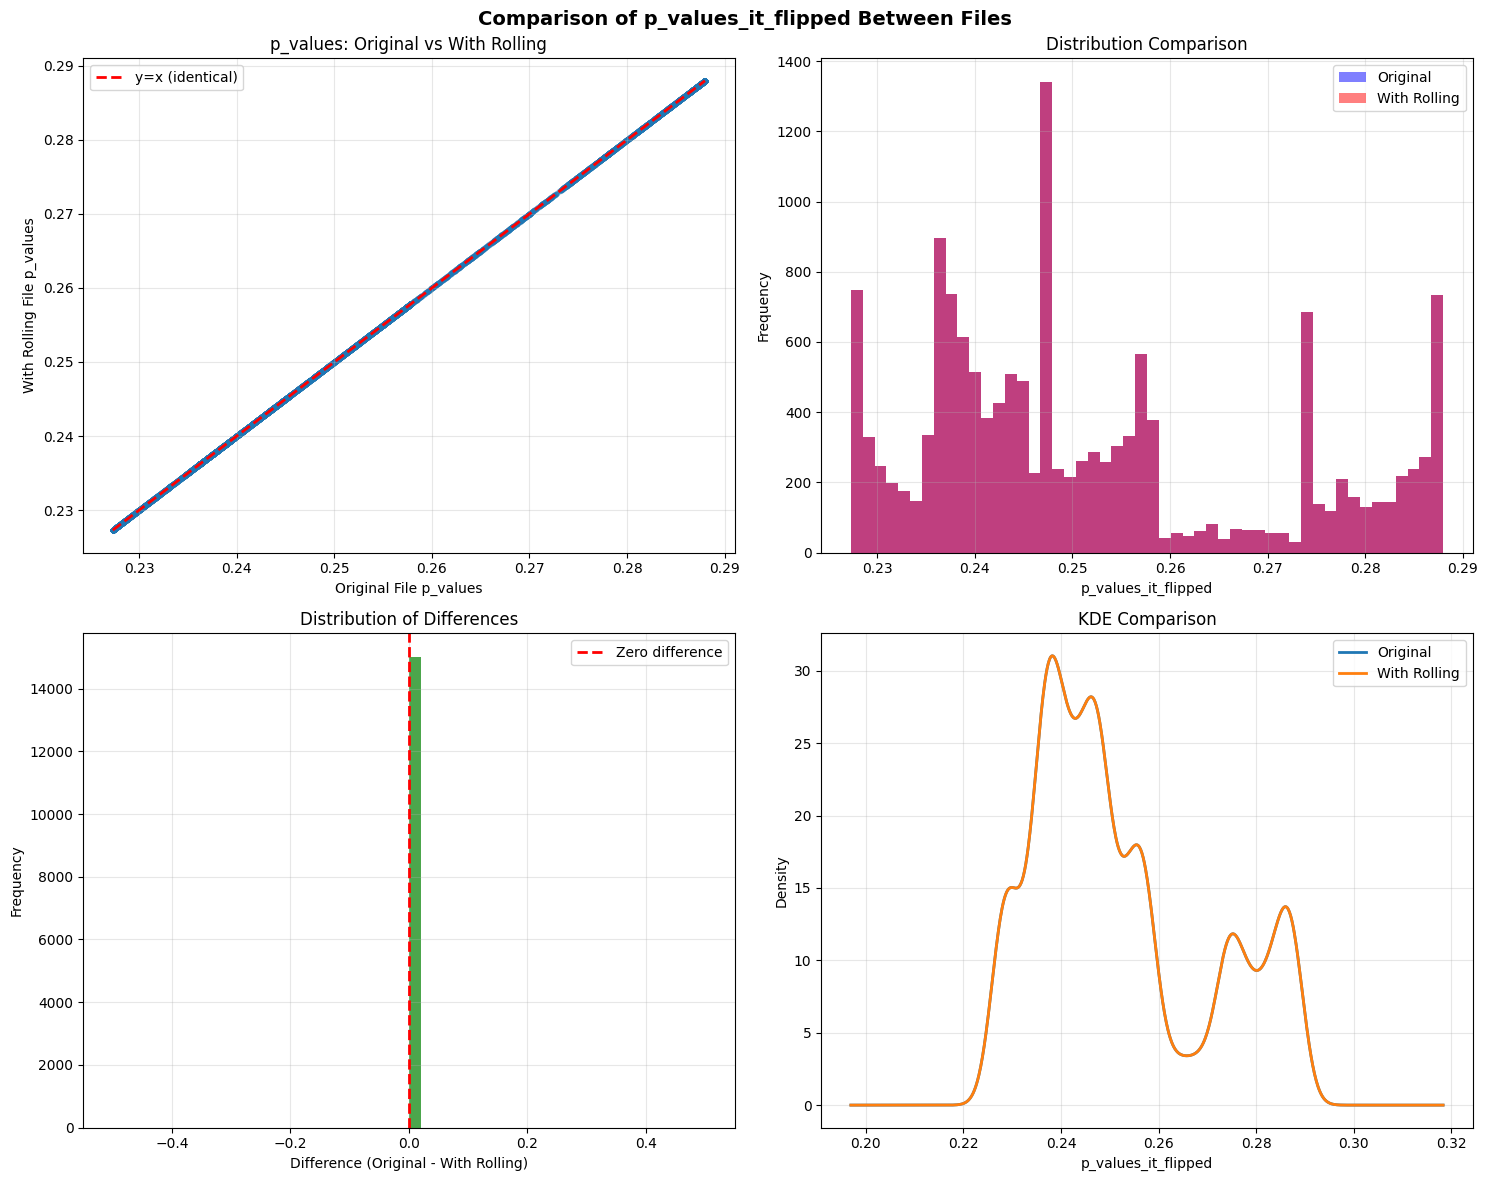

In [124]:
# Visualize p_values comparison between files
if col_name in df_original.columns and col_name in df_with_rolling.columns and len(df_original) == len(df_with_rolling):
    fig, axes = plt.subplots(2, 2, figsize=(15, 12))
    fig.suptitle('Comparison of p_values_it_flipped Between Files', fontsize=14, fontweight='bold')
    
    # 1. Scatter plot: original vs rolling
    axes[0, 0].scatter(df_original[col_name], df_with_rolling[col_name], alpha=0.3, s=10)
    axes[0, 0].plot([df_original[col_name].min(), df_original[col_name].max()], 
                     [df_original[col_name].min(), df_original[col_name].max()], 
                     'r--', linewidth=2, label='y=x (identical)')
    axes[0, 0].set_xlabel('Original File p_values')
    axes[0, 0].set_ylabel('With Rolling File p_values')
    axes[0, 0].set_title('p_values: Original vs With Rolling')
    axes[0, 0].legend()
    axes[0, 0].grid(True, alpha=0.3)
    
    # 2. Histogram overlay
    axes[0, 1].hist(df_original[col_name].dropna(), bins=50, alpha=0.5, label='Original', color='blue')
    axes[0, 1].hist(df_with_rolling[col_name].dropna(), bins=50, alpha=0.5, label='With Rolling', color='red')
    axes[0, 1].set_xlabel('p_values_it_flipped')
    axes[0, 1].set_ylabel('Frequency')
    axes[0, 1].set_title('Distribution Comparison')
    axes[0, 1].legend()
    axes[0, 1].grid(True, alpha=0.3)
    
    # 3. Difference plot
    diff = df_original[col_name] - df_with_rolling[col_name]
    axes[1, 0].hist(diff.dropna(), bins=50, color='green', alpha=0.7)
    axes[1, 0].axvline(0, color='red', linestyle='--', linewidth=2, label='Zero difference')
    axes[1, 0].set_xlabel('Difference (Original - With Rolling)')
    axes[1, 0].set_ylabel('Frequency')
    axes[1, 0].set_title('Distribution of Differences')
    axes[1, 0].legend()
    axes[1, 0].grid(True, alpha=0.3)
    
    # 4. KDE overlay
    df_original[col_name].dropna().plot(kind='kde', ax=axes[1, 1], label='Original', linewidth=2)
    df_with_rolling[col_name].dropna().plot(kind='kde', ax=axes[1, 1], label='With Rolling', linewidth=2)
    axes[1, 1].set_xlabel('p_values_it_flipped')
    axes[1, 1].set_ylabel('Density')
    axes[1, 1].set_title('KDE Comparison')
    axes[1, 1].legend()
    axes[1, 1].grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()

## Analyze p_values with Respect to Other Columns in BOTH Files

In [125]:
# Compare how p_values relate to other columns in both files
key_columns = ['Tested - Untested IT Distractor Similarity', 'it_ltm_diff']

if col_name in df_original.columns and col_name in df_with_rolling.columns:
    for key_col in key_columns:
        if key_col in df_original.columns and key_col in df_with_rolling.columns:
            print(f"\n{'=' * 80}")
            print(f"CORRELATION: {col_name} vs {key_col}")
            print(f"{'=' * 80}")
            
            corr_original = df_original[[col_name, key_col]].corr().iloc[0, 1]
            corr_rolling = df_with_rolling[[col_name, key_col]].corr().iloc[0, 1]
            
            print(f"\nOriginal File correlation: {corr_original:.4f}")
            print(f"With Rolling File correlation: {corr_rolling:.4f}")
            print(f"Difference in correlation: {abs(corr_original - corr_rolling):.4f}")


CORRELATION: p_values_it_flipped vs Tested - Untested IT Distractor Similarity

Original File correlation: 0.0131
With Rolling File correlation: 0.0131
Difference in correlation: 0.0000

CORRELATION: p_values_it_flipped vs it_ltm_diff

Original File correlation: 0.0067
With Rolling File correlation: 0.0067
Difference in correlation: 0.0000


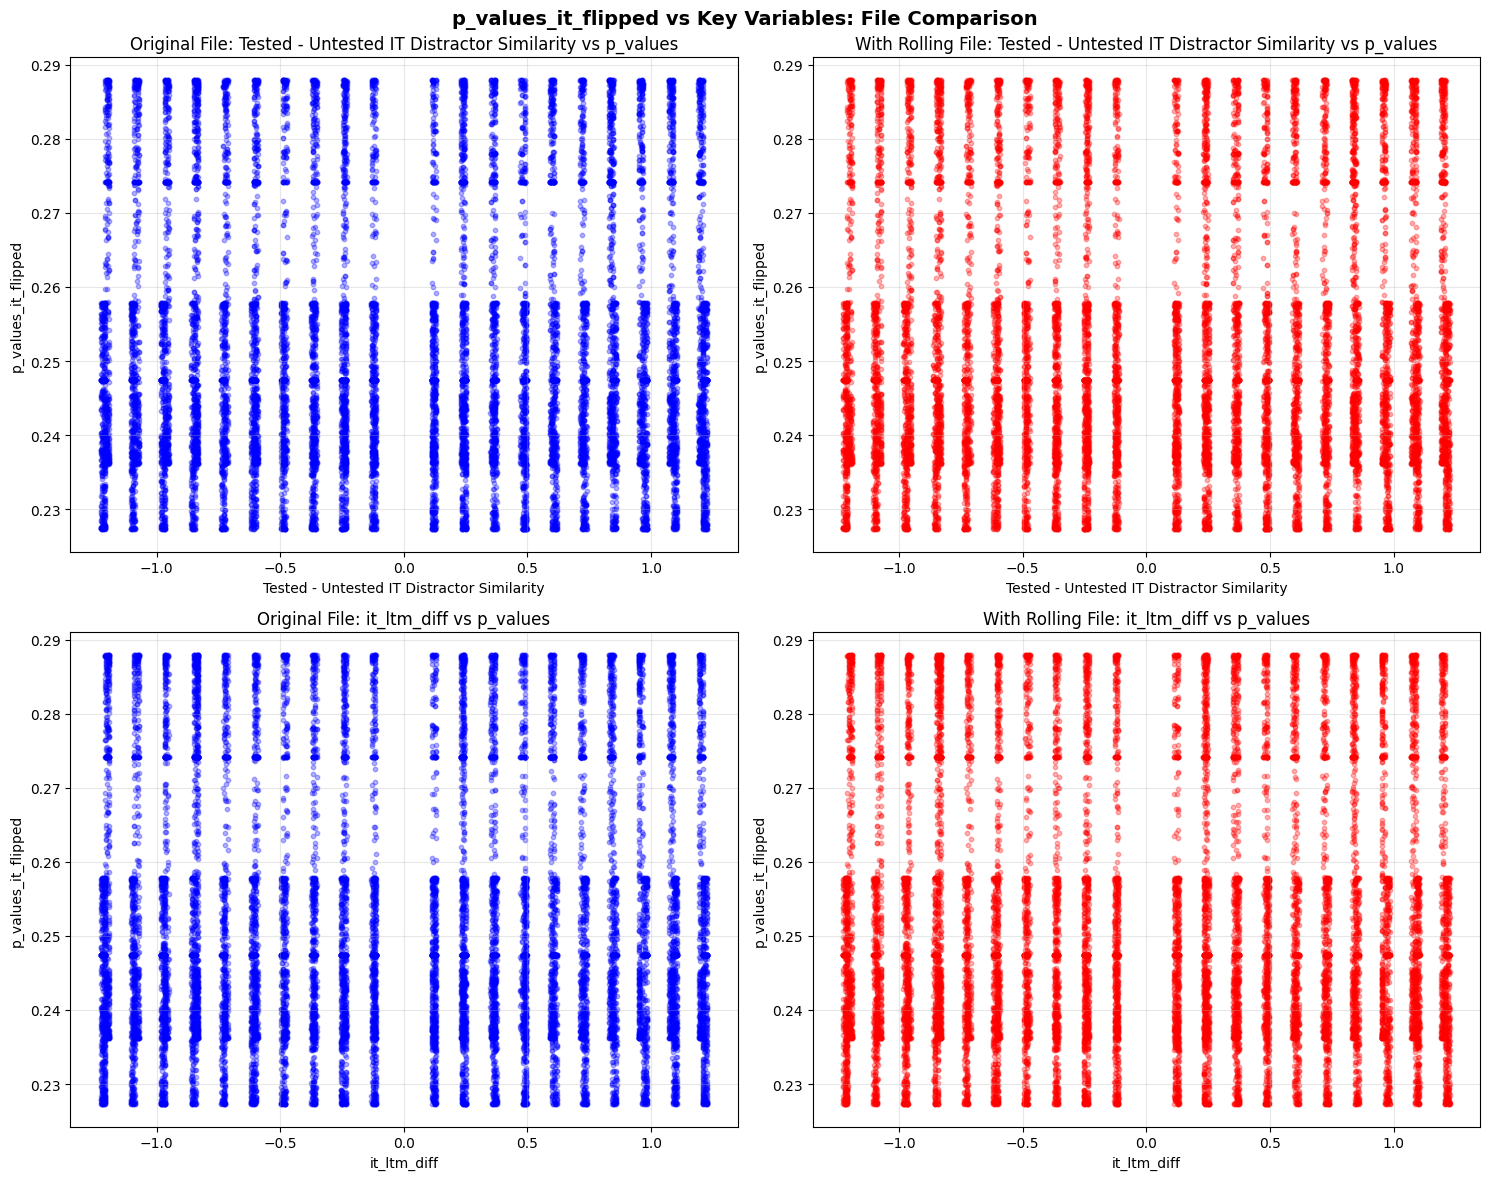

In [126]:
# Side-by-side scatter plots comparing both files
if col_name in df_original.columns and col_name in df_with_rolling.columns:
    key_columns = ['Tested - Untested IT Distractor Similarity', 'it_ltm_diff']
    
    fig, axes = plt.subplots(2, 2, figsize=(15, 12))
    fig.suptitle('p_values_it_flipped vs Key Variables: File Comparison', fontsize=14, fontweight='bold')
    
    for idx, key_col in enumerate(key_columns):
        if key_col in df_original.columns and key_col in df_with_rolling.columns:
            # Original file
            axes[idx, 0].scatter(df_original[key_col], df_original[col_name], alpha=0.3, s=10, color='blue')
            axes[idx, 0].set_xlabel(key_col)
            axes[idx, 0].set_ylabel(col_name)
            axes[idx, 0].set_title(f'Original File: {key_col} vs p_values')
            axes[idx, 0].grid(True, alpha=0.3)
            
            # With rolling file
            axes[idx, 1].scatter(df_with_rolling[key_col], df_with_rolling[col_name], alpha=0.3, s=10, color='red')
            axes[idx, 1].set_xlabel(key_col)
            axes[idx, 1].set_ylabel(col_name)
            axes[idx, 1].set_title(f'With Rolling File: {key_col} vs p_values')
            axes[idx, 1].grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()

## Hexbin Comparison: p_values vs Key Variables

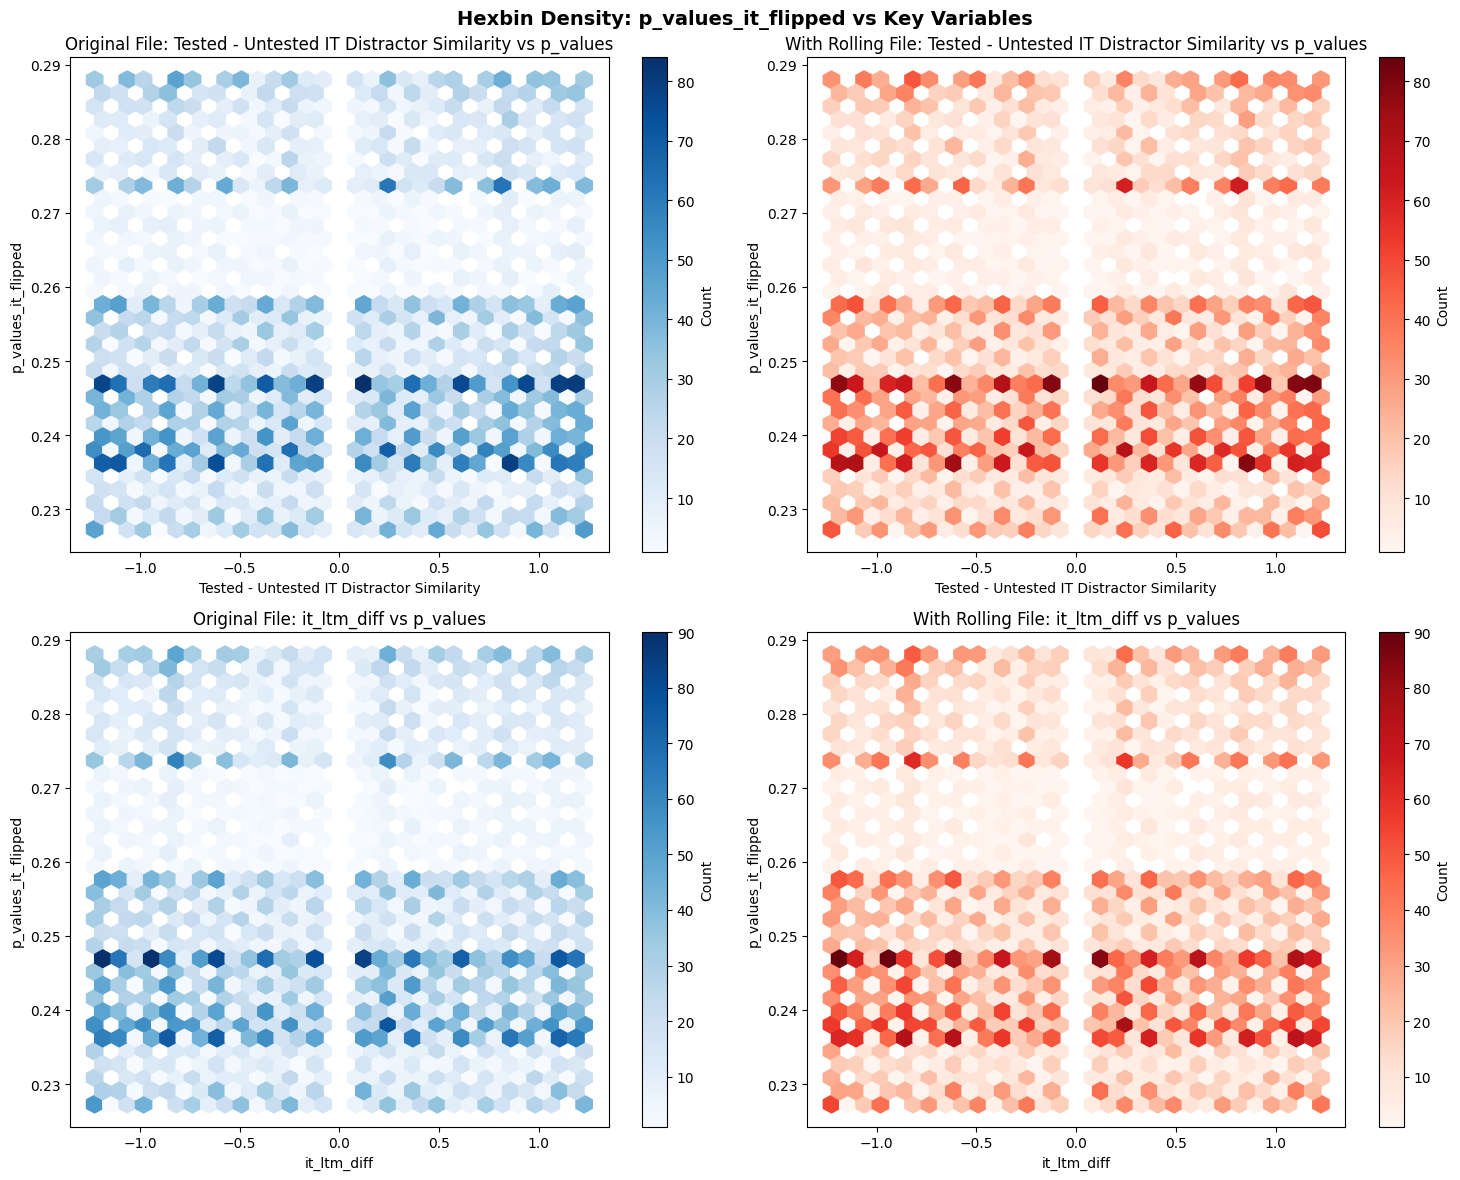

In [127]:
# Hexbin plots comparing both files
if col_name in df_original.columns and col_name in df_with_rolling.columns:
    key_columns = ['Tested - Untested IT Distractor Similarity', 'it_ltm_diff']
    
    fig, axes = plt.subplots(2, 2, figsize=(15, 12))
    fig.suptitle('Hexbin Density: p_values_it_flipped vs Key Variables', fontsize=14, fontweight='bold')
    
    for idx, key_col in enumerate(key_columns):
        if key_col in df_original.columns and key_col in df_with_rolling.columns:
            # Original file
            hb1 = axes[idx, 0].hexbin(df_original[key_col], df_original[col_name], 
                                       gridsize=30, cmap='Blues', mincnt=1)
            axes[idx, 0].set_xlabel(key_col)
            axes[idx, 0].set_ylabel(col_name)
            axes[idx, 0].set_title(f'Original File: {key_col} vs p_values')
            plt.colorbar(hb1, ax=axes[idx, 0], label='Count')
            
            # With rolling file
            hb2 = axes[idx, 1].hexbin(df_with_rolling[key_col], df_with_rolling[col_name], 
                                       gridsize=30, cmap='Reds', mincnt=1)
            axes[idx, 1].set_xlabel(key_col)
            axes[idx, 1].set_ylabel(col_name)
            axes[idx, 1].set_title(f'With Rolling File: {key_col} vs p_values')
            plt.colorbar(hb2, ax=axes[idx, 1], label='Count')
    
    plt.tight_layout()
    plt.show()

WHERE DO p_values DIFFER MOST?

Difference statistics:
count    15013.0
mean         0.0
std          0.0
min          0.0
25%          0.0
50%          0.0
75%          0.0
max          0.0
Name: p_value_diff, dtype: float64

Top 10 rows with largest POSITIVE differences (Original > With Rolling):
   p_value_diff  p_values_it_flipped  \
0           0.0               0.2742   
1           0.0               0.2742   
2           0.0               0.2742   
3           0.0               0.2742   
4           0.0               0.2742   
5           0.0               0.2742   
6           0.0               0.2742   
7           0.0               0.2742   
8           0.0               0.2742   
9           0.0               0.2742   

   Tested - Untested IT Distractor Similarity  it_ltm_diff  
0                                    0.832221     0.832221  
1                                    1.072043    -1.072043  
2                                   -0.230685     0.230685  
3              

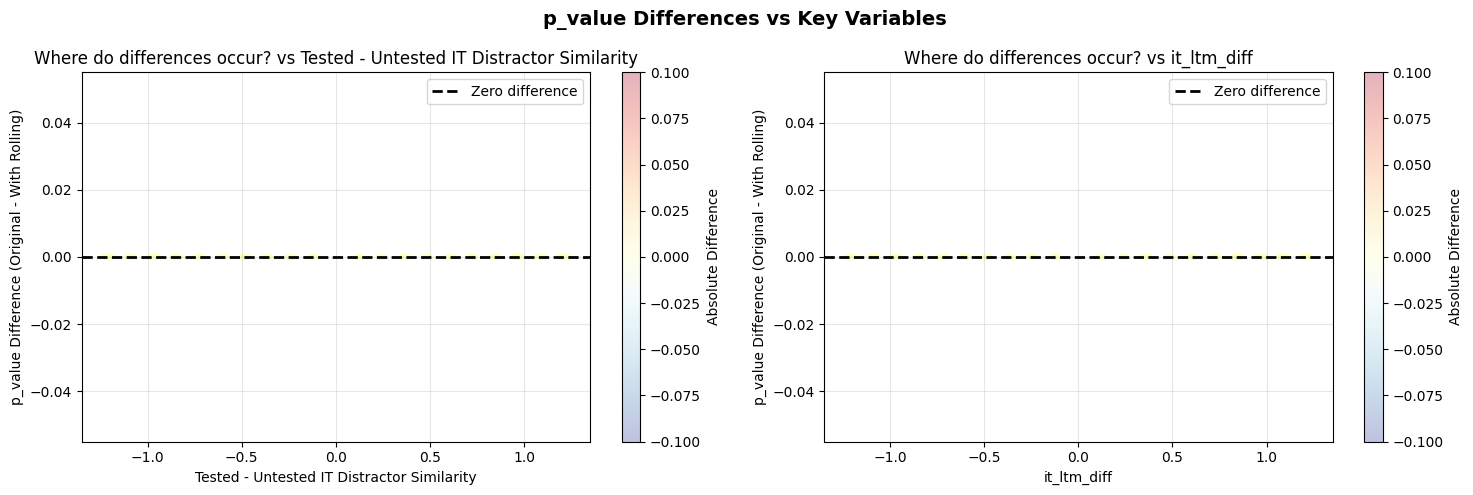

In [128]:
# Analyze where the biggest differences in p_values occur with respect to other columns
if col_name in df_original.columns and col_name in df_with_rolling.columns and len(df_original) == len(df_with_rolling):
    # Calculate difference in p_values
    df_original['p_value_diff'] = df_original[col_name] - df_with_rolling[col_name]
    
    print("=" * 80)
    print("WHERE DO p_values DIFFER MOST?")
    print("=" * 80)
    
    print(f"\nDifference statistics:")
    print(df_original['p_value_diff'].describe())
    
    # Find rows with largest differences
    largest_diffs = df_original.nlargest(10, 'p_value_diff', keep='first')
    smallest_diffs = df_original.nsmallest(10, 'p_value_diff', keep='first')
    
    print(f"\nTop 10 rows with largest POSITIVE differences (Original > With Rolling):")
    display_cols = ['p_value_diff', col_name, 'Tested - Untested IT Distractor Similarity', 'it_ltm_diff']
    display_cols = [c for c in display_cols if c in df_original.columns]
    print(largest_diffs[display_cols])
    
    print(f"\nTop 10 rows with largest NEGATIVE differences (Original < With Rolling):")
    print(smallest_diffs[display_cols])
    
    # Visualize difference with respect to key columns
    key_columns = ['Tested - Untested IT Distractor Similarity', 'it_ltm_diff']
    
    fig, axes = plt.subplots(1, 2, figsize=(15, 5))
    fig.suptitle('p_value Differences vs Key Variables', fontsize=14, fontweight='bold')
    
    for idx, key_col in enumerate(key_columns):
        if key_col in df_original.columns:
            scatter = axes[idx].scatter(df_original[key_col], df_original['p_value_diff'], 
                                        alpha=0.3, s=10, c=abs(df_original['p_value_diff']), 
                                        cmap='RdYlBu_r')
            axes[idx].axhline(0, color='black', linestyle='--', linewidth=2, label='Zero difference')
            axes[idx].set_xlabel(key_col)
            axes[idx].set_ylabel('p_value Difference (Original - With Rolling)')
            axes[idx].set_title(f'Where do differences occur? vs {key_col}')
            axes[idx].grid(True, alpha=0.3)
            axes[idx].legend()
            plt.colorbar(scatter, ax=axes[idx], label='Absolute Difference')
    
    plt.tight_layout()
    plt.show()
    
    # Clean up
    df_original.drop('p_value_diff', axis=1, inplace=True)

## Time Series Comparison: p_values Over Trials

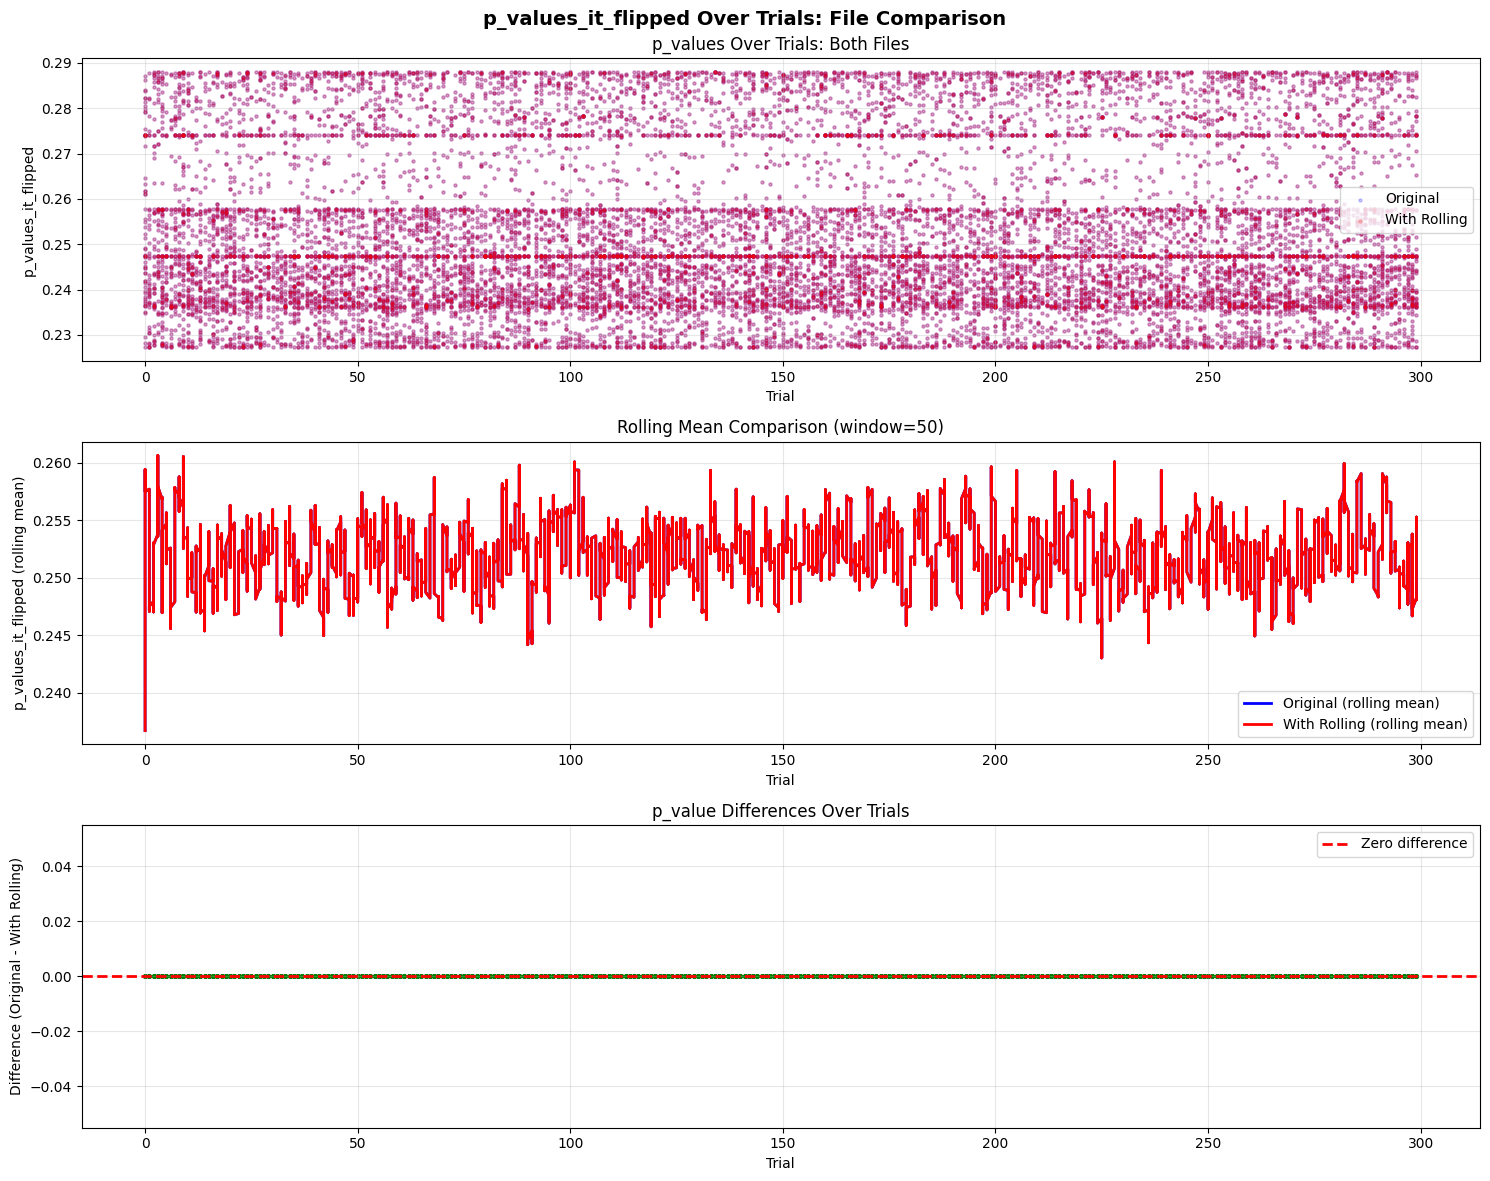

In [129]:
# Compare p_values over trials between files
if 'trial' in df_original.columns and 'trial' in df_with_rolling.columns:
    if col_name in df_original.columns and col_name in df_with_rolling.columns:
        fig, axes = plt.subplots(3, 1, figsize=(15, 12))
        fig.suptitle('p_values_it_flipped Over Trials: File Comparison', fontsize=14, fontweight='bold')
        
        # Plot 1: Both files overlaid
        axes[0].scatter(df_original['trial'], df_original[col_name], alpha=0.2, s=5, label='Original', color='blue')
        axes[0].scatter(df_with_rolling['trial'], df_with_rolling[col_name], alpha=0.2, s=5, label='With Rolling', color='red')
        axes[0].set_xlabel('Trial')
        axes[0].set_ylabel(col_name)
        axes[0].set_title('p_values Over Trials: Both Files')
        axes[0].legend()
        axes[0].grid(True, alpha=0.3)
        
        # Plot 2: Rolling means comparison
        if len(df_original) > 50:
            rolling_orig = df_original.sort_values('trial').set_index('trial')[col_name].rolling(window=50, min_periods=1).mean()
            rolling_wr = df_with_rolling.sort_values('trial').set_index('trial')[col_name].rolling(window=50, min_periods=1).mean()
            axes[1].plot(rolling_orig.index, rolling_orig.values, linewidth=2, label='Original (rolling mean)', color='blue')
            axes[1].plot(rolling_wr.index, rolling_wr.values, linewidth=2, label='With Rolling (rolling mean)', color='red')
            axes[1].set_xlabel('Trial')
            axes[1].set_ylabel(f'{col_name} (rolling mean)')
            axes[1].set_title('Rolling Mean Comparison (window=50)')
            axes[1].legend()
            axes[1].grid(True, alpha=0.3)
        
        # Plot 3: Difference over trials
        if len(df_original) == len(df_with_rolling):
            diff = df_original.sort_values('trial').set_index('trial')[col_name] - df_with_rolling.sort_values('trial').set_index('trial')[col_name]
            axes[2].scatter(diff.index, diff.values, alpha=0.3, s=5, color='green')
            axes[2].axhline(0, color='red', linestyle='--', linewidth=2, label='Zero difference')
            axes[2].set_xlabel('Trial')
            axes[2].set_ylabel('Difference (Original - With Rolling)')
            axes[2].set_title('p_value Differences Over Trials')
            axes[2].legend()
            axes[2].grid(True, alpha=0.3)
        
        plt.tight_layout()
        plt.show()

## Correlation Heatmap Comparison

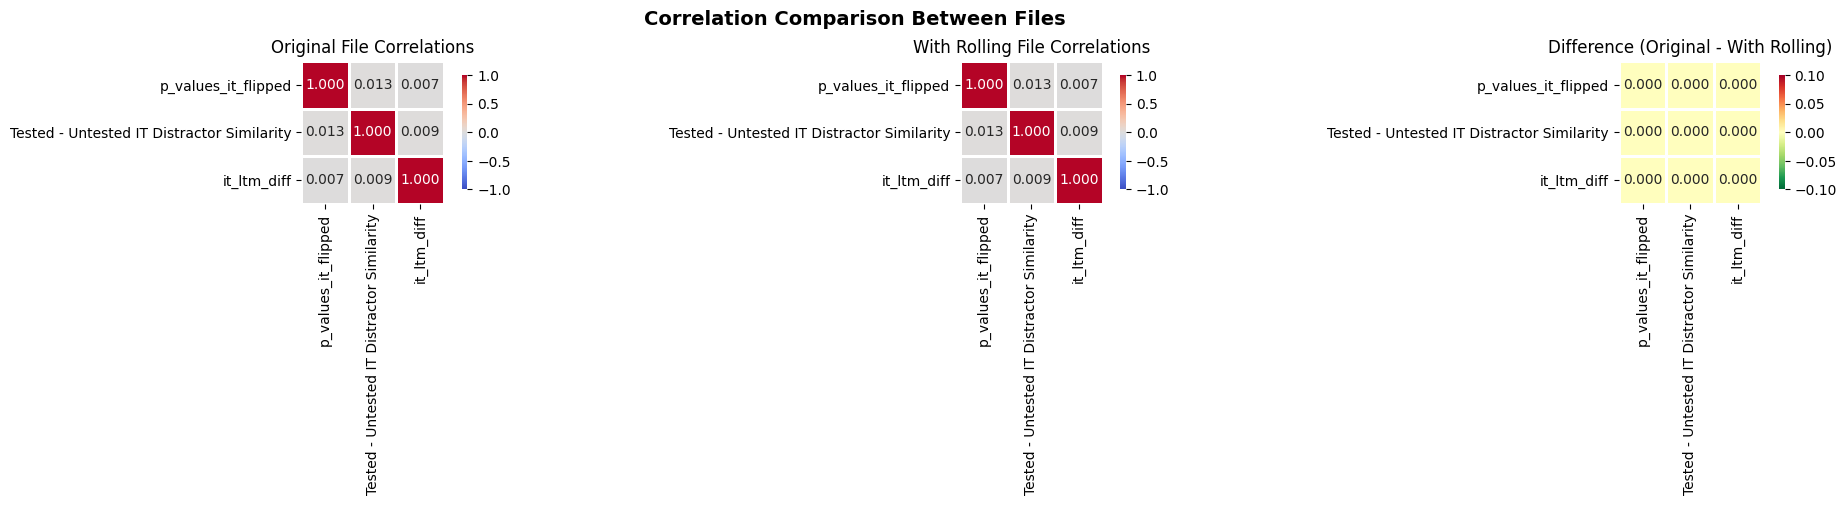


Correlation Matrix - Original File:
                                            p_values_it_flipped  \
p_values_it_flipped                                    1.000000   
Tested - Untested IT Distractor Similarity             0.013141   
it_ltm_diff                                            0.006711   

                                            Tested - Untested IT Distractor Similarity  \
p_values_it_flipped                                                           0.013141   
Tested - Untested IT Distractor Similarity                                    1.000000   
it_ltm_diff                                                                   0.009411   

                                            it_ltm_diff  
p_values_it_flipped                            0.006711  
Tested - Untested IT Distractor Similarity     0.009411  
it_ltm_diff                                    1.000000  

Correlation Matrix - With Rolling File:
                                            p_values_it_flip

In [130]:
# Compare correlation matrices between files
correlation_cols = [col_name, 'Tested - Untested IT Distractor Similarity', 'it_ltm_diff']
correlation_cols = [col for col in correlation_cols if col in df_original.columns and col in df_with_rolling.columns]

if len(correlation_cols) > 1:
    fig, axes = plt.subplots(1, 3, figsize=(20, 5))
    fig.suptitle('Correlation Comparison Between Files', fontsize=14, fontweight='bold')
    
    # Original file correlations
    corr_original = df_original[correlation_cols].corr()
    sns.heatmap(corr_original, annot=True, cmap='coolwarm', center=0, 
                square=True, linewidths=1, fmt='.3f', vmin=-1, vmax=1,
                ax=axes[0], cbar_kws={'shrink': 0.8})
    axes[0].set_title('Original File Correlations')
    
    # With rolling file correlations
    corr_rolling = df_with_rolling[correlation_cols].corr()
    sns.heatmap(corr_rolling, annot=True, cmap='coolwarm', center=0, 
                square=True, linewidths=1, fmt='.3f', vmin=-1, vmax=1,
                ax=axes[1], cbar_kws={'shrink': 0.8})
    axes[1].set_title('With Rolling File Correlations')
    
    # Difference in correlations
    corr_diff = corr_original - corr_rolling
    sns.heatmap(corr_diff, annot=True, cmap='RdYlGn_r', center=0, 
                square=True, linewidths=1, fmt='.3f', vmin=-0.1, vmax=0.1,
                ax=axes[2], cbar_kws={'shrink': 0.8})
    axes[2].set_title('Difference (Original - With Rolling)')
    
    plt.tight_layout()
    plt.show()
    
    print("\nCorrelation Matrix - Original File:")
    print(corr_original)
    print("\nCorrelation Matrix - With Rolling File:")
    print(corr_rolling)
    print("\nDifference in Correlations:")
    print(corr_diff)

## Additional Comparison Visualizations

### Binned Analysis: p_values Comparison by Value Ranges


p_values COMPARISON BY Tested - Untested IT Distractor Similarity BINS
                  Original_mean  Rolling_mean  Original_std  Rolling_std  \
bins                                                                       
(-1.228, -0.836]       0.251621      0.251621      0.017651     0.017651   
(-0.836, -0.25]        0.251723      0.251723      0.017767     0.017767   
(-0.25, 0.358]         0.251993      0.251993      0.017714     0.017714   
(0.358, 0.842]         0.252826      0.252826      0.018234     0.018234   
(0.842, 1.227]         0.251677      0.251677      0.017617     0.017617   

                  Mean_diff  
bins                         
(-1.228, -0.836]        0.0  
(-0.836, -0.25]         0.0  
(-0.25, 0.358]          0.0  
(0.358, 0.842]          0.0  
(0.842, 1.227]          0.0  


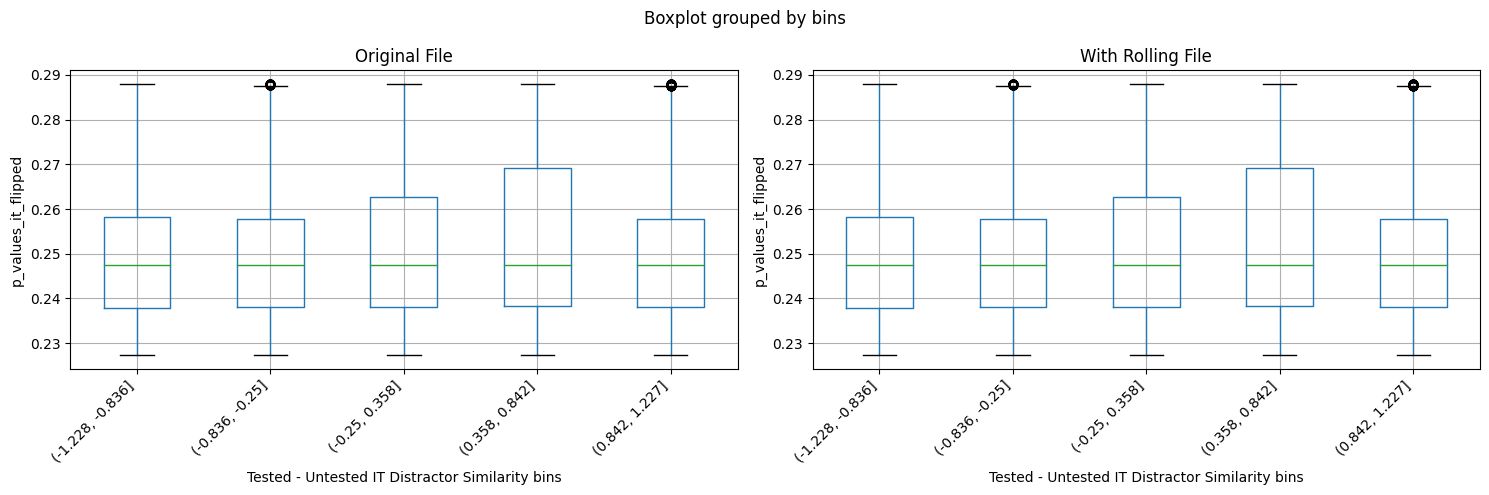


p_values COMPARISON BY it_ltm_diff BINS
                  Original_mean  Rolling_mean  Original_std  Rolling_std  \
bins                                                                       
(-1.228, -0.842]       0.251106      0.251106      0.017358     0.017358   
(-0.842, -0.359]       0.252791      0.252791      0.018328     0.018328   
(-0.359, 0.248]        0.251805      0.251805      0.017670     0.017670   
(0.248, 0.834]         0.251948      0.251948      0.017729     0.017729   
(0.834, 1.227]         0.252198      0.252198      0.017880     0.017880   

                  Mean_diff  
bins                         
(-1.228, -0.842]        0.0  
(-0.842, -0.359]        0.0  
(-0.359, 0.248]         0.0  
(0.248, 0.834]          0.0  
(0.834, 1.227]          0.0  


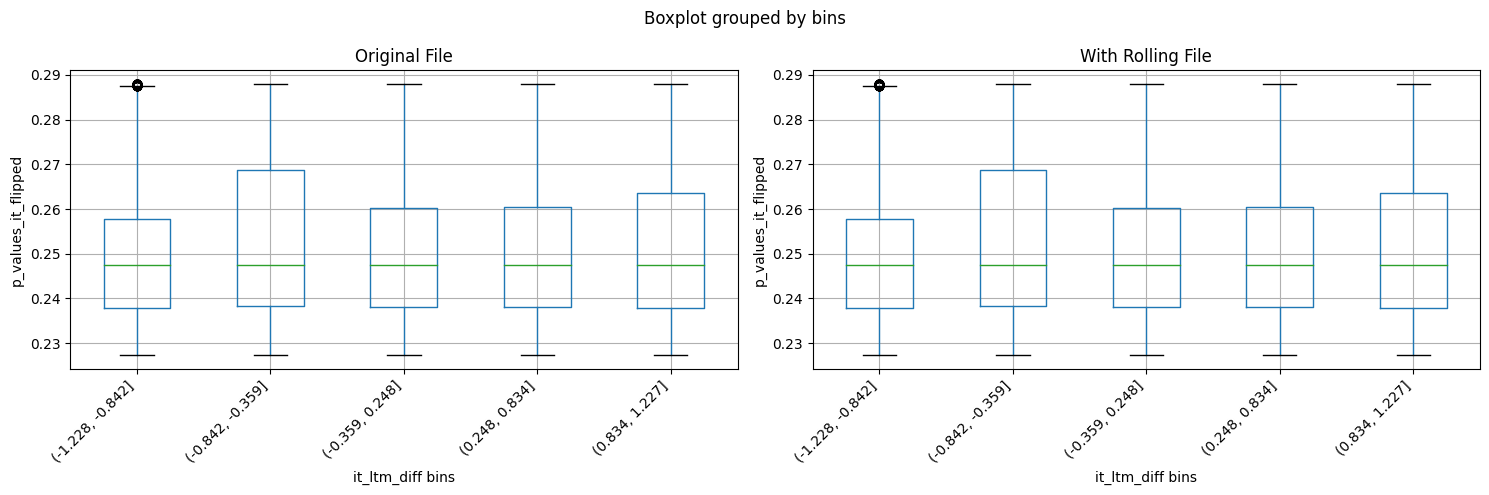

In [131]:
# Bin the key columns and compare p_values in each bin
if col_name in df_original.columns and col_name in df_with_rolling.columns:
    key_columns = ['Tested - Untested IT Distractor Similarity', 'it_ltm_diff']
    
    for key_col in key_columns:
        if key_col in df_original.columns and key_col in df_with_rolling.columns:
            # Create bins
            bins = pd.qcut(df_original[key_col], q=5, duplicates='drop')
            df_original['bins'] = bins
            df_with_rolling['bins'] = pd.qcut(df_with_rolling[key_col], q=5, duplicates='drop')
            
            # Compare p_values by bin
            print(f"\n{'=' * 80}")
            print(f"p_values COMPARISON BY {key_col} BINS")
            print(f"{'=' * 80}")
            
            bin_comparison = pd.DataFrame({
                'Original_mean': df_original.groupby('bins')[col_name].mean(),
                'Rolling_mean': df_with_rolling.groupby('bins')[col_name].mean(),
                'Original_std': df_original.groupby('bins')[col_name].std(),
                'Rolling_std': df_with_rolling.groupby('bins')[col_name].std()
            })
            bin_comparison['Mean_diff'] = bin_comparison['Original_mean'] - bin_comparison['Rolling_mean']
            print(bin_comparison)
            
            # Visualize
            fig, axes = plt.subplots(1, 2, figsize=(15, 5))
            fig.suptitle(f'p_values by {key_col} Bins', fontsize=14, fontweight='bold')
            
            # Box plot by bins
            df_original.boxplot(column=col_name, by='bins', ax=axes[0])
            axes[0].set_title('Original File')
            axes[0].set_xlabel(key_col + ' bins')
            axes[0].set_ylabel(col_name)
            plt.sca(axes[0])
            plt.xticks(rotation=45, ha='right')
            
            df_with_rolling.boxplot(column=col_name, by='bins', ax=axes[1])
            axes[1].set_title('With Rolling File')
            axes[1].set_xlabel(key_col + ' bins')
            axes[1].set_ylabel(col_name)
            plt.sca(axes[1])
            plt.xticks(rotation=45, ha='right')
            
            plt.tight_layout()
            plt.show()
            
            # Clean up
            df_original.drop('bins', axis=1, inplace=True)
            df_with_rolling.drop('bins', axis=1, inplace=True)

### Joint Distribution Comparison: Both Files Side-by-Side


Creating joint plots for Tested - Untested IT Distractor Similarity vs p_values_it_flipped


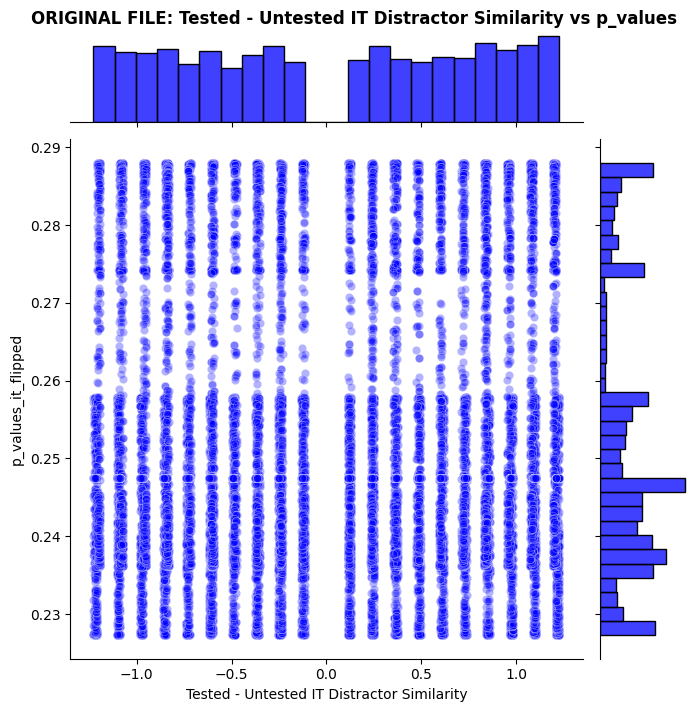

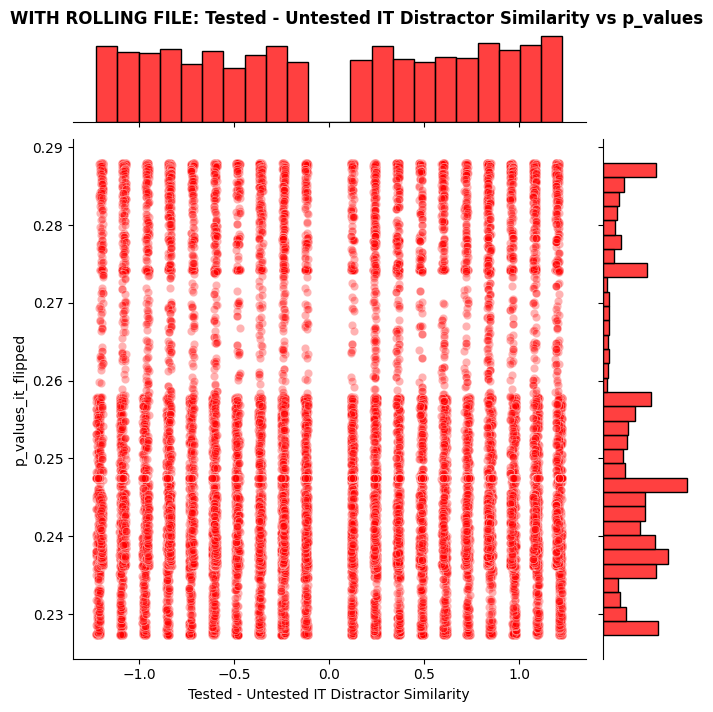


Creating joint plots for it_ltm_diff vs p_values_it_flipped


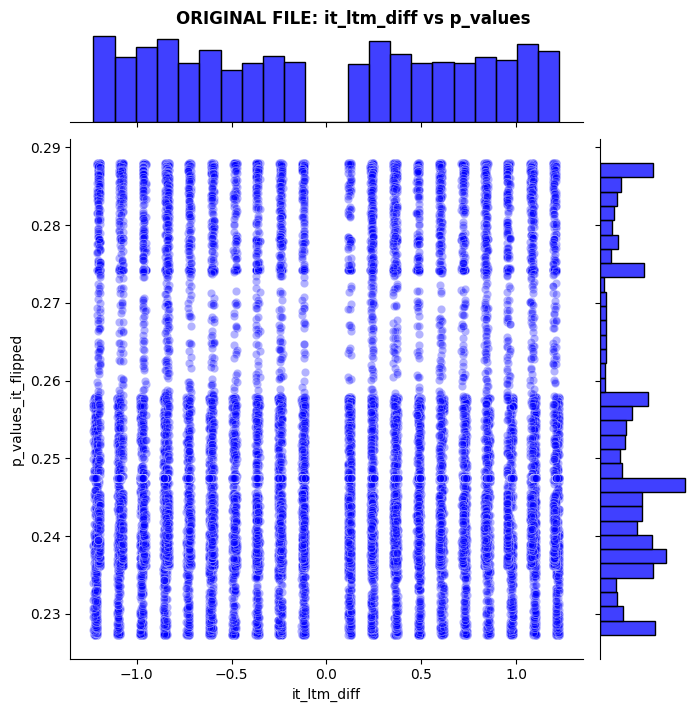

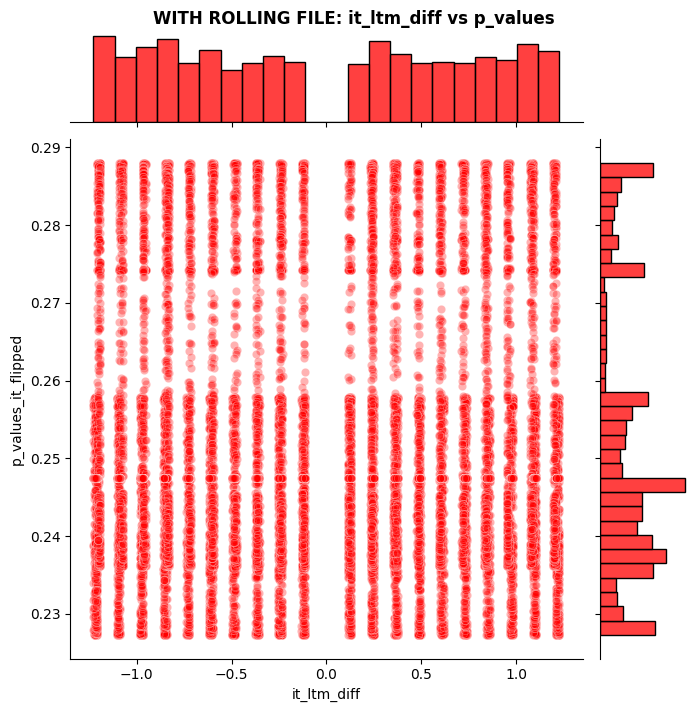

In [132]:
# Joint plots comparing both files
if col_name in df_original.columns and col_name in df_with_rolling.columns:
    key_columns = ['Tested - Untested IT Distractor Similarity', 'it_ltm_diff']
    
    for key_col in key_columns:
        if key_col in df_original.columns and key_col in df_with_rolling.columns:
            print(f"\nCreating joint plots for {key_col} vs {col_name}")
            
            # Original file
            g1 = sns.jointplot(data=df_original, x=key_col, y=col_name, 
                               kind='scatter', alpha=0.3, height=7, color='blue')
            g1.fig.suptitle(f'ORIGINAL FILE: {key_col} vs p_values', y=1.01, fontsize=12, fontweight='bold')
            plt.show()
            
            # With rolling file
            g2 = sns.jointplot(data=df_with_rolling, x=key_col, y=col_name, 
                               kind='scatter', alpha=0.3, height=7, color='red')
            g2.fig.suptitle(f'WITH ROLLING FILE: {key_col} vs p_values', y=1.01, fontsize=12, fontweight='bold')
            plt.show()

In [133]:
### Percentile Analysis: Where Do p_values Differ Most?

# Percentile comparison of p_values
if col_name in df_original.columns and col_name in df_with_rolling.columns:
    print("=" * 80)
    print("PERCENTILE COMPARISON OF p_values_it_flipped")
    print("=" * 80)
    
    percentiles = [1, 5, 10, 25, 50, 75, 90, 95, 99]
    
    print(f"\n{'Percentile':<12} {'Original':<12} {'With Rolling':<12} {'Difference':<12}")
    print("-" * 80)
    
    for p in percentiles:
        orig_val = np.percentile(df_original[col_name].dropna(), p)
        roll_val = np.percentile(df_with_rolling[col_name].dropna(), p)
        diff = orig_val - roll_val
        print(f"{p}th{'':<9} {orig_val:<12.6f} {roll_val:<12.6f} {diff:<12.6f}")
    
    # Visualize percentile comparison
    orig_percentiles = [np.percentile(df_original[col_name].dropna(), p) for p in percentiles]
    roll_percentiles = [np.percentile(df_with_rolling[col_name].dropna(), p) for p in percentiles]
    
    fig, axes = plt.subplots(1, 2, figsize=(15, 5))
    fig.suptitle('Percentile Comparison of p_values', fontsize=14, fontweight='bold')
    
    # Line plot
    axes[0].plot(percentiles, orig_percentiles, 'o-', linewidth=2, label='Original', color='blue')
    axes[0].plot(percentiles, roll_percentiles, 'o-', linewidth=2, label='With Rolling', color='red')
    axes[0].set_xlabel('Percentile')
    axes[0].set_ylabel('p_values_it_flipped')
    axes[0].set_title('Percentile Values Comparison')
    axes[0].legend()
    axes[0].grid(True, alpha=0.3)
    
    # Difference plot
    diff_percentiles = [o - r for o, r in zip(orig_percentiles, roll_percentiles)]
    axes[1].bar(percentiles, diff_percentiles, color='green', alpha=0.7)
    axes[1].axhline(0, color='red', linestyle='--', linewidth=2)
    axes[1].set_xlabel('Percentile')
    axes[1].set_ylabel('Difference (Original - With Rolling)')
    axes[1].set_title('Percentile Differences')
    axes[1].grid(True, alpha=0.3, axis='y')
    
    plt.tight_layout()
    plt.show()

In [134]:
### Summary: Key Takeaways

# Summary of comparison
print("=" * 80)
print("SUMMARY: p_values_it_flipped COMPARISON")
print("=" * 80)

if col_name in df_original.columns and col_name in df_with_rolling.columns:
    # Overall statistics
    print("\n1. OVERALL STATISTICS:")
    print(f"   Original file: mean={df_original[col_name].mean():.6f}, std={df_original[col_name].std():.6f}")
    print(f"   With Rolling file: mean={df_with_rolling[col_name].mean():.6f}, std={df_with_rolling[col_name].std():.6f}")
    
    # Correlation comparison
    print("\n2. CORRELATIONS WITH KEY VARIABLES:")
    key_columns = ['Tested - Untested IT Distractor Similarity', 'it_ltm_diff']
    for key_col in key_columns:
        if key_col in df_original.columns and key_col in df_with_rolling.columns:
            corr_orig = df_original[[col_name, key_col]].corr().iloc[0, 1]
            corr_roll = df_with_rolling[[col_name, key_col]].corr().iloc[0, 1]
            print(f"   {key_col}:")
            print(f"     Original: {corr_orig:.4f}, With Rolling: {corr_roll:.4f}, Diff: {abs(corr_orig - corr_roll):.4f}")
    
    # Difference statistics
    if len(df_original) == len(df_with_rolling):
        diff = df_original[col_name] - df_with_rolling[col_name]
        print("\n3. DIFFERENCES (Original - With Rolling):")
        print(f"   Number of differences: {(diff != 0).sum()} / {len(diff)}")
        print(f"   Max absolute difference: {diff.abs().max():.6f}")
        print(f"   Mean absolute difference: {diff.abs().mean():.6f}")
        print(f"   Std of differences: {diff.std():.6f}")
    
    print("\n" + "=" * 80)

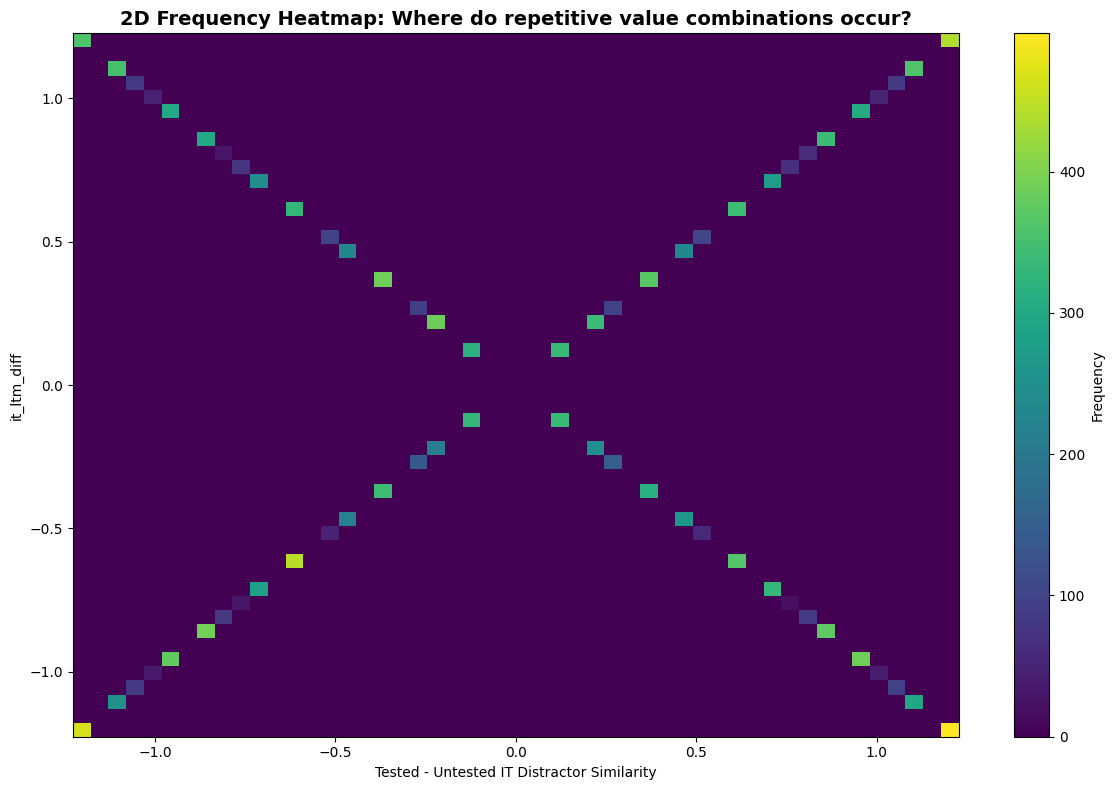

In [135]:
# 2D histogram showing relationship between IT Similarity and it_ltm_diff
# This helps understand where repetitive values occur together
if 'Tested - Untested IT Distractor Similarity' in df_original.columns and 'it_ltm_diff' in df_original.columns:
    plt.figure(figsize=(12, 8))
    plt.hist2d(df_original['Tested - Untested IT Distractor Similarity'], 
               df_original['it_ltm_diff'], 
               bins=50, cmap='viridis')
    plt.colorbar(label='Frequency')
    plt.xlabel('Tested - Untested IT Distractor Similarity')
    plt.ylabel('it_ltm_diff')
    plt.title('2D Frequency Heatmap: Where do repetitive value combinations occur?', fontsize=14, fontweight='bold')
    plt.tight_layout()
    plt.show()

### 9. Value Frequency Heatmap (for repetitive values)

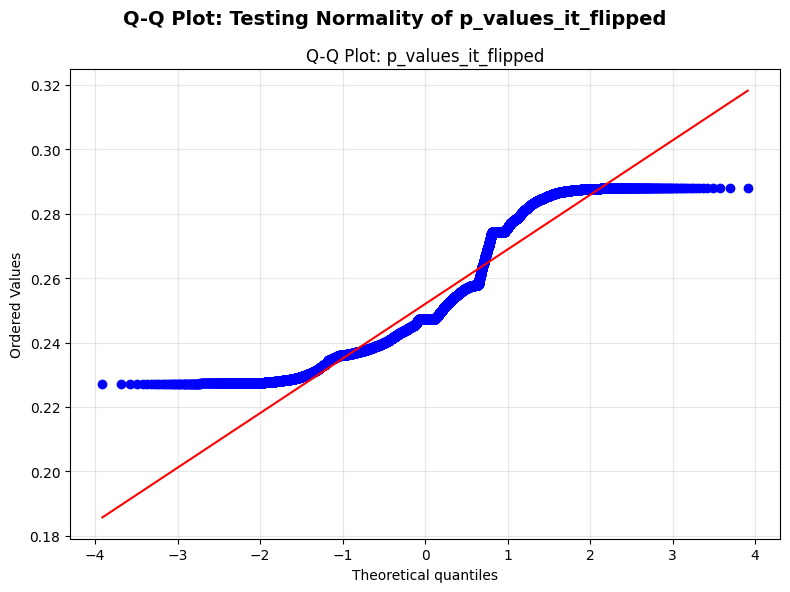

In [136]:
# Q-Q plot to check normality of p_values
from scipy import stats

fig, ax = plt.subplots(1, 1, figsize=(8, 6))
fig.suptitle('Q-Q Plot: Testing Normality of p_values_it_flipped', fontsize=14, fontweight='bold')

if col_name in df_original.columns:
    data = df_original[col_name].dropna()
    stats.probplot(data, dist="norm", plot=ax)
    ax.set_title(f'Q-Q Plot: {col_name}')
    ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

### 8. Quantile-Quantile (Q-Q) Plots

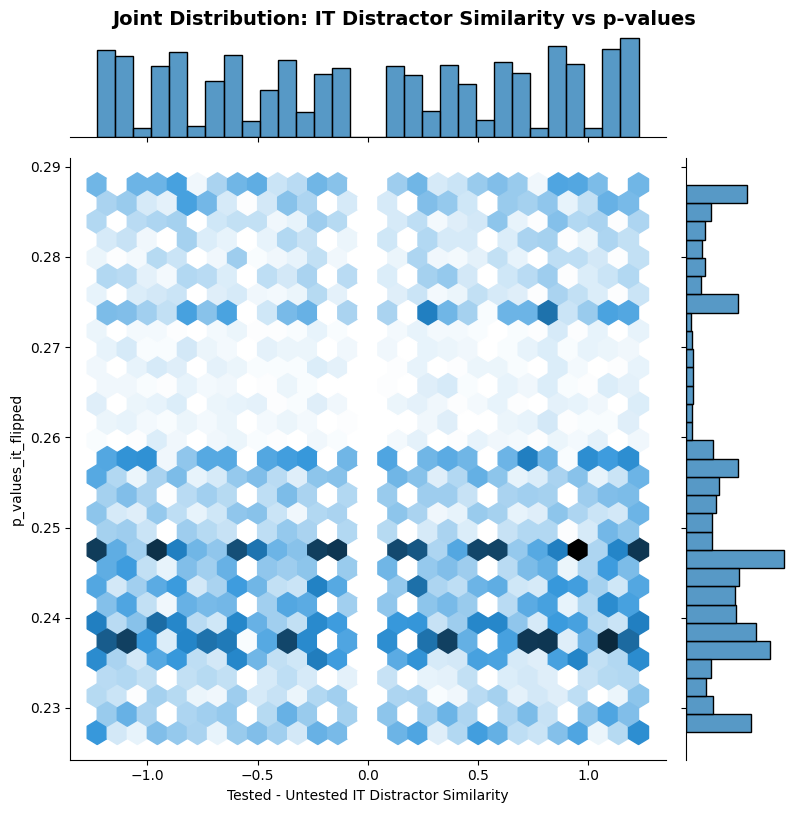

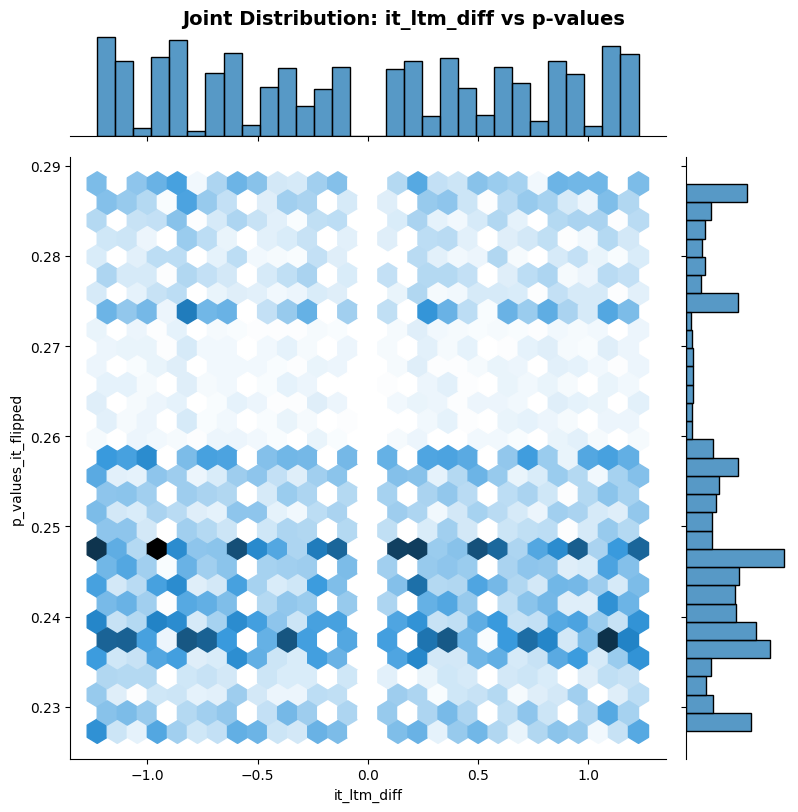

In [137]:
# Joint plots showing marginal distributions
if 'Tested - Untested IT Distractor Similarity' in df_original.columns:
    g = sns.jointplot(data=df_original, 
                      x='Tested - Untested IT Distractor Similarity', 
                      y=col_name, 
                      kind='hex', 
                      height=8,
                      marginal_kws={'bins': 30})
    g.fig.suptitle('Joint Distribution: IT Distractor Similarity vs p-values', 
                   y=1.01, fontsize=14, fontweight='bold')
    plt.show()

if 'it_ltm_diff' in df_original.columns:
    g = sns.jointplot(data=df_original, 
                      x='it_ltm_diff', 
                      y=col_name, 
                      kind='hex', 
                      height=8,
                      marginal_kws={'bins': 30})
    g.fig.suptitle('Joint Distribution: it_ltm_diff vs p-values', 
                   y=1.01, fontsize=14, fontweight='bold')
    plt.show()

### 7. Joint Plot with Marginal Distributions

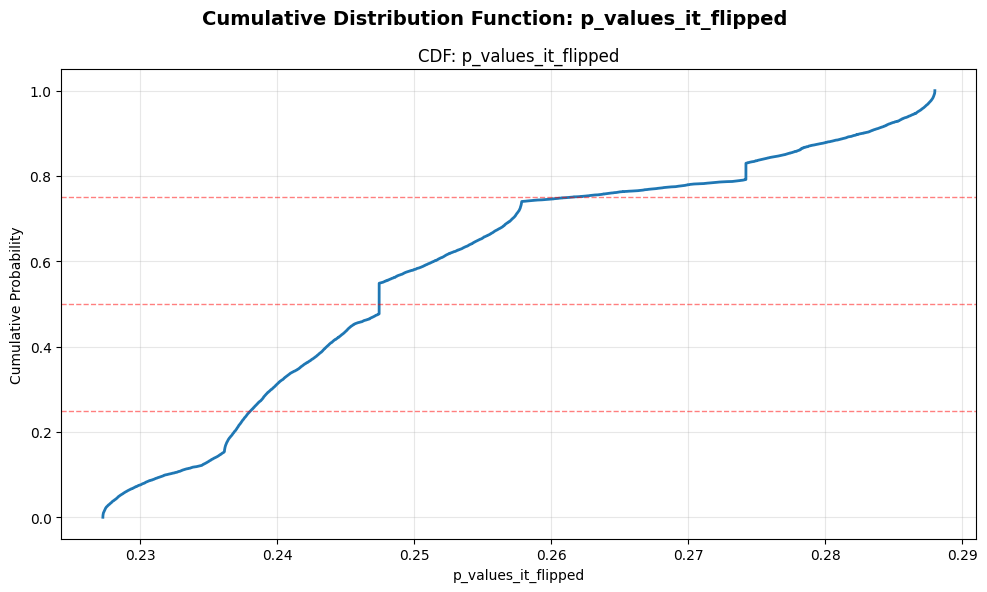

In [138]:
# CDF plot for p_values only
fig, ax = plt.subplots(1, 1, figsize=(10, 6))
fig.suptitle('Cumulative Distribution Function: p_values_it_flipped', fontsize=14, fontweight='bold')

if col_name in df_original.columns:
    data_sorted = np.sort(df_original[col_name].dropna())
    cdf = np.arange(1, len(data_sorted) + 1) / len(data_sorted)
    ax.plot(data_sorted, cdf, linewidth=2)
    ax.set_xlabel(col_name)
    ax.set_ylabel('Cumulative Probability')
    ax.set_title(f'CDF: {col_name}')
    ax.grid(True, alpha=0.3)
    # Add reference lines at quartiles
    for q, label in [(0.25, 'Q1'), (0.5, 'Median'), (0.75, 'Q3')]:
        ax.axhline(q, color='red', linestyle='--', alpha=0.5, linewidth=1)

plt.tight_layout()
plt.show()

### 6. Cumulative Distribution Function (CDF)

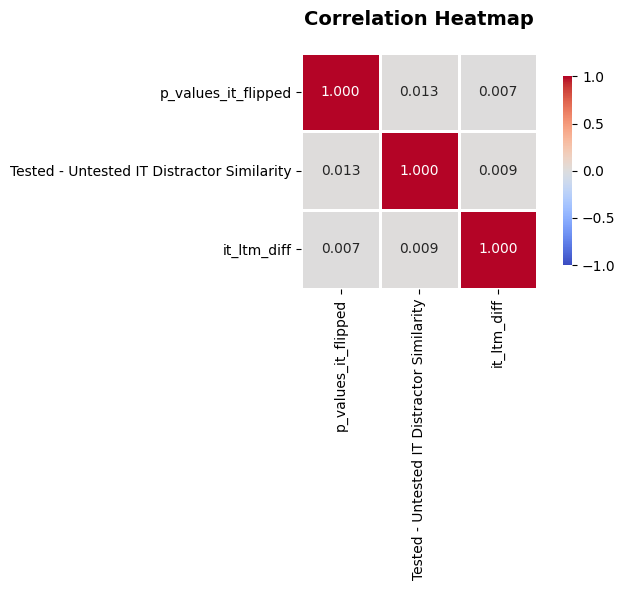


Correlation Matrix:
                                            p_values_it_flipped  \
p_values_it_flipped                                    1.000000   
Tested - Untested IT Distractor Similarity             0.013141   
it_ltm_diff                                            0.006711   

                                            Tested - Untested IT Distractor Similarity  \
p_values_it_flipped                                                           0.013141   
Tested - Untested IT Distractor Similarity                                    1.000000   
it_ltm_diff                                                                   0.009411   

                                            it_ltm_diff  
p_values_it_flipped                            0.006711  
Tested - Untested IT Distractor Similarity     0.009411  
it_ltm_diff                                    1.000000  


In [139]:
# Correlation heatmap
correlation_cols = [col_name, 'Tested - Untested IT Distractor Similarity', 'it_ltm_diff']
correlation_cols = [col for col in correlation_cols if col in df_original.columns]

if len(correlation_cols) > 1:
    corr_matrix = df_original[correlation_cols].corr()
    
    plt.figure(figsize=(8, 6))
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, 
                square=True, linewidths=1, cbar_kws={'shrink': 0.8},
                fmt='.3f', vmin=-1, vmax=1)
    plt.title('Correlation Heatmap', fontsize=14, fontweight='bold', pad=20)
    plt.tight_layout()
    plt.show()
    
    print("\nCorrelation Matrix:")
    print(corr_matrix)

### 5. Correlation Heatmap

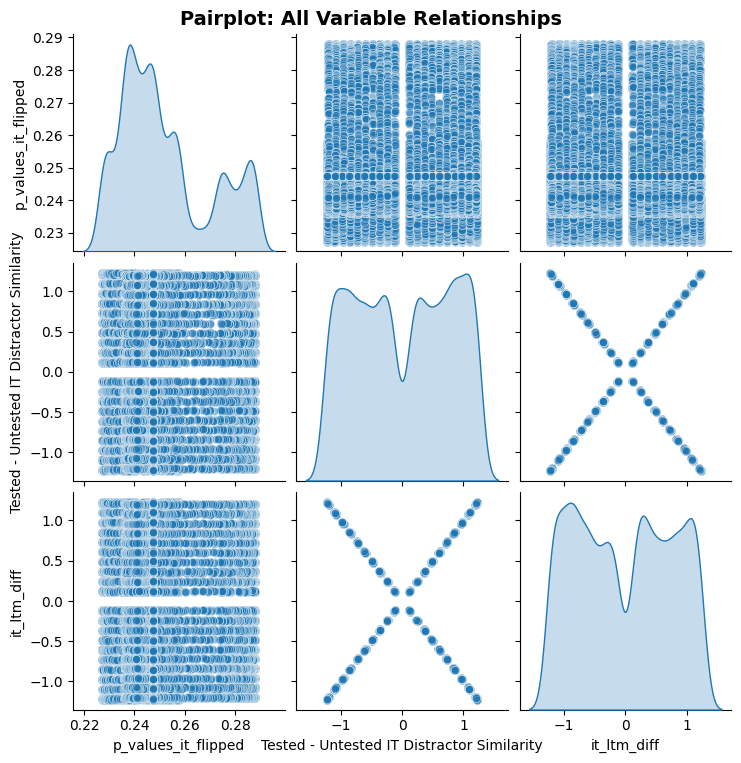

In [140]:
# Pairplot to see all relationships at once
plot_columns = [col_name, 'Tested - Untested IT Distractor Similarity', 'it_ltm_diff']
plot_columns = [col for col in plot_columns if col in df_original.columns]

if len(plot_columns) > 1:
    pairplot_data = df_original[plot_columns].dropna()
    sns.pairplot(pairplot_data, diag_kind='kde', plot_kws={'alpha': 0.5})
    plt.suptitle('Pairplot: All Variable Relationships', y=1.01, fontsize=14, fontweight='bold')
    plt.show()

### 4. Pairplot: Multiple Relationships

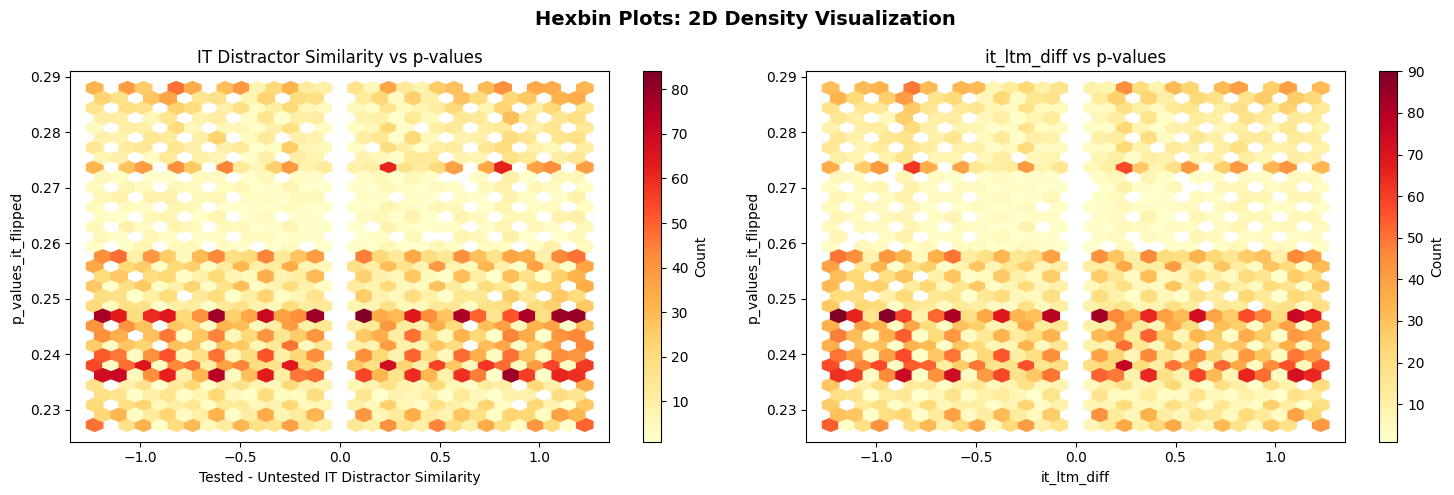

In [141]:
# Hexbin plots to show 2D density
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
fig.suptitle('Hexbin Plots: 2D Density Visualization', fontsize=14, fontweight='bold')

# IT Distractor Similarity vs p-values
if 'Tested - Untested IT Distractor Similarity' in df_original.columns:
    hb1 = axes[0].hexbin(df_original['Tested - Untested IT Distractor Similarity'], 
                          df_original[col_name], 
                          gridsize=30, cmap='YlOrRd', mincnt=1)
    axes[0].set_xlabel('Tested - Untested IT Distractor Similarity')
    axes[0].set_ylabel(col_name)
    axes[0].set_title('IT Distractor Similarity vs p-values')
    plt.colorbar(hb1, ax=axes[0], label='Count')

# it_ltm_diff vs p-values
if 'it_ltm_diff' in df_original.columns:
    hb2 = axes[1].hexbin(df_original['it_ltm_diff'], 
                          df_original[col_name], 
                          gridsize=30, cmap='YlOrRd', mincnt=1)
    axes[1].set_xlabel('it_ltm_diff')
    axes[1].set_ylabel(col_name)
    axes[1].set_title('it_ltm_diff vs p-values')
    plt.colorbar(hb2, ax=axes[1], label='Count')

plt.tight_layout()
plt.show()

### 3. Hexbin Plot: 2D Density

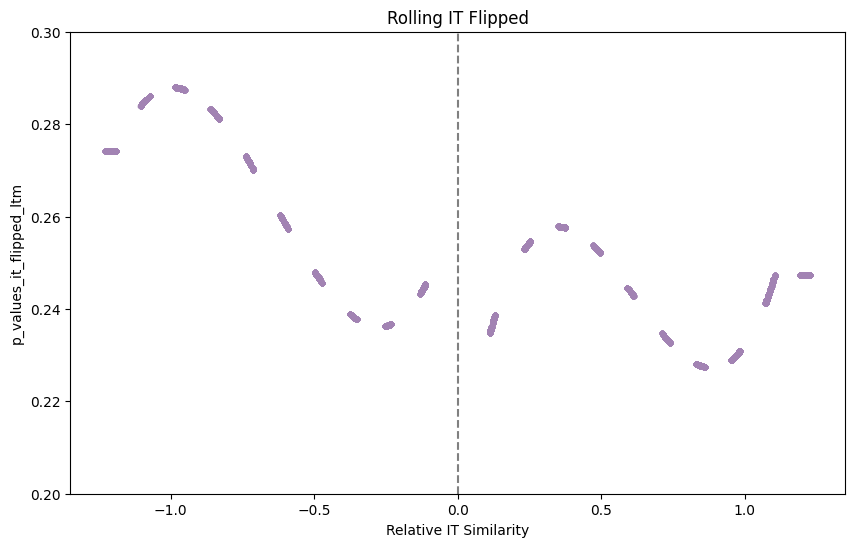

In [160]:
df = pd.read_csv('pilot_total_ltm_stats/TEST_wm_ltm_p_pilot_total_with_predictions_and_rolling.csv')
# df = pd.read_csv('pilot5_ltm_stats/TEST_wm_ltm_p_pilot5_with_predictions_and_rolling.csv')

# df = pd.read_csv('pilot5_ltm_stats/TEST_wm_ltm_p_pilot5_with_predictions_and_rolling.csv')

plt.figure(figsize=(10, 6))



plt.scatter(df['it_ltm_diff'], df['p_values_it_flipped_ltm'], 
            c='#A283B3', alpha=0.5, s=10)
plt.axvline(x=0, color='grey', linestyle='--')
plt.axhline(y=0, color='grey', linestyle=':')
plt.xlabel('Relative IT Similarity')
plt.ylabel('p_values_it_flipped_ltm')
plt.title('Rolling IT Flipped')
plt.ylim(0.2, 0.3)  # Set y limits here

plt.show()

# # V2 plot
# plt.figure(figsize=(10, 6))
# plt.scatter(df['v2_ltm_diff'], df['rolling_v2_flipped'], 
#             c='#E58A72', alpha=0.5, s=10)
# plt.axvline(x=0, color='grey', linestyle='--')
# plt.axhline(y=0, color='grey', linestyle=':')
# plt.xlabel('Relative V2 Similarity')
# plt.ylabel('rolling_v2_flipped')
# plt.title('Rolling V2 Flipped')
# plt.show()